In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('/home/st/st_us-053030/st_st161532/AiFakeDetection')

feature_path = 'data/Tinyfeatures_ResNet'
feature_path_DANN = 'data/Tinyfeatures_ResNetDANN'
feature_path_Midjourney = 'data/Tinyfeatures_resnet_unchanged_midjourney'#_ResNetDANN_Midjourney'
feature_path_SD = 'data/Tinyfeatures_resnet_unchanged_SD1.4'#_ResNetDANN_Midjourney'
feature_path_BigGAN = 'data/Tinyfeatures_ResNetDANN_BigGAN'

generators = os.listdir(feature_path_SD)
generators = ['Midjourney']#generators[:1]

real_features = []
ai_features = {}
for generator in generators:
    print(generator)
    feature_vectors = np.stack([np.load(os.path.join(feature_path, generator,'ai', f)) for f in os.listdir(os.path.join(feature_path, generator, 'ai'))])
    ai_features[generator] = feature_vectors
    real_features.extend([np.load(os.path.join(feature_path, generator,'real', f)) for f in os.listdir(os.path.join(feature_path, generator, 'real'))])
real_features = np.stack(real_features)

Midjourney


In [33]:
all_features = np.concatenate([real_features] + [ai_features[generator] for generator in generators])
all_labels = np.concatenate([
    np.zeros(len(real_features)),
    *[
        (np.zeros(len(ai_features[generator])) + i + 1)
        for i, generator in enumerate(generators)
    ]
])

In [34]:
print(all_features[:10])

[[8.02349985e-01 2.96820283e-01 2.02656090e-01 ... 2.15013579e-01
  3.90058517e-01 5.33469737e-01]
 [4.10242617e-01 3.56039822e-01 8.33608434e-02 ... 9.52997506e-02
  3.53045583e-01 3.96780908e-01]
 [7.31987953e-02 2.22715229e-01 0.00000000e+00 ... 8.60388856e-03
  4.04263288e-02 1.14302576e-01]
 ...
 [1.08190030e-01 2.54544497e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.28319979e-02]
 [3.67144257e-01 2.65882432e-01 2.97583756e-04 ... 7.48232156e-02
  1.91388309e-01 3.28548580e-01]
 [9.71732616e-01 3.62549633e-01 3.80585402e-01 ... 1.47191077e-01
  2.84878641e-01 5.15008807e-01]]


In [35]:
# do some analysis
real_features_mean = np.mean(real_features)
real_features_std = np.std(real_features)
ai_features_mean = {k: np.mean(v) for k, v in ai_features.items()}
ai_features_std = {k: np.std(v) for k, v in ai_features.items()}


# feature vector is 2048 long -> t-SNE to 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(all_features)

# feature vector is 2048 long -> PCA to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(all_features)



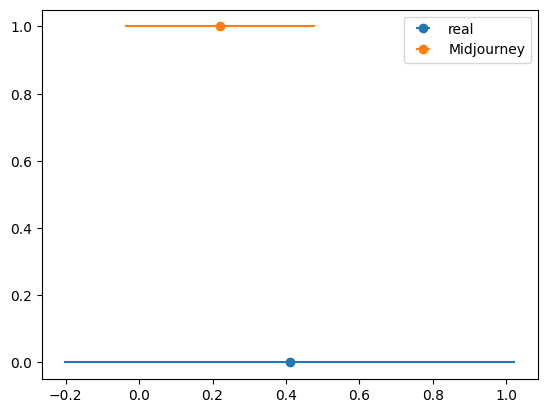

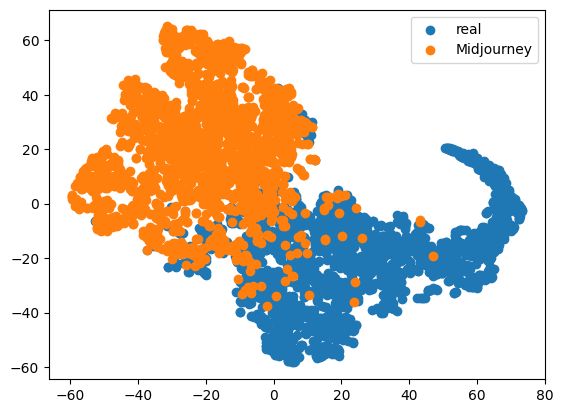

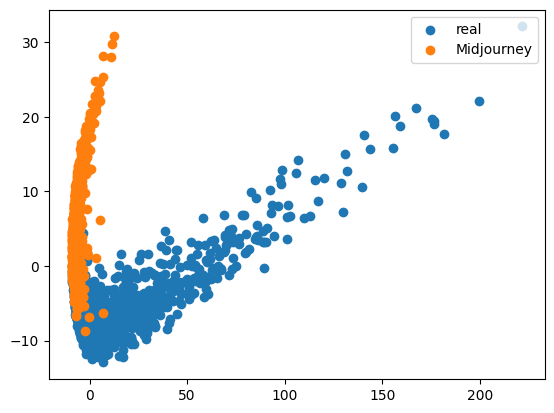

In [36]:

# plot the results

plt.figure()
# error bars
plt.errorbar(real_features_mean, 0, xerr=real_features_std, fmt='o', label='real')
for i,(k, v) in enumerate(ai_features_mean.items()):
    plt.errorbar(v, i+1, xerr=ai_features_std[k], fmt='o', label=k)
plt.legend(loc='best')
plt.show()


plt.figure()
plt.scatter(tsne_features[all_labels == 0, 0], tsne_features[all_labels == 0, 1], label='real')
for i,(k, v) in enumerate(ai_features.items()):
    plt.scatter(tsne_features[all_labels == i+1, 0], tsne_features[all_labels == i+1, 1], label=k)
plt.legend(loc='upper right')
plt.savefig('tsne.png',bbox_inches='tight')
plt.show()

plt.figure()
plt.scatter(pca_features[all_labels == 0, 0], pca_features[all_labels == 0, 1], label='real')
for i,(k, v) in enumerate(ai_features.items()):
    plt.scatter(pca_features[all_labels == i+1, 0], pca_features[all_labels == i+1, 1], label=k)
plt.legend(loc='upper right')
plt.show()
